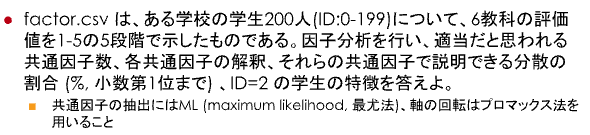

In [1]:
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
X=pd.read_csv('factor.csv', encoding='shift-jis')
display(X.head())

X2=X.iloc[:,1:]
X3=pd.DataFrame(scale(X2),columns=X2.columns.values)

N=len(X3)
display(X3.head())

,生徒,国語,英語,社会,数学,理科,技術
0,1,4,4,4,4,3,5
1,2,4,4,4,4,5,5
2,3,3,3,4,4,4,4
3,4,3,3,3,3,3,2
4,5,3,3,2,2,3,2


,国語,英語,社会,数学,理科,技術
0,1.239016,1.838701,1.391748,1.302917,0.030165,2.755431
1,1.239016,1.838701,1.391748,1.302917,3.046650,2.755431
2,0.030220,-0.018573,1.391748,1.302917,1.538407,1.387971
3,0.030220,-0.018573,0.053529,0.006482,0.030165,-1.346948
4,0.030220,-0.018573,-1.284691,-1.289953,0.030165,-1.346948


In [3]:
df_corr = X2.corr()
display(df_corr)

,国語,英語,社会,数学,理科,技術
国語,1.000000,0.415898,0.483673,0.250544,0.290794,0.222532
英語,0.415898,1.000000,0.498082,0.264982,0.294688,0.305151
社会,0.483673,0.498082,1.000000,0.294588,0.402057,0.346595
数学,0.250544,0.264982,0.294588,1.000000,0.576629,0.558306
理科,0.290794,0.294688,0.402057,0.576629,1.000000,0.525309
技術,0.222532,0.305151,0.346595,0.558306,0.525309,1.000000


In [4]:
import numpy.linalg as LA
import scipy as sp
df_corr_b = sp.array(df_corr)

from scipy import linalg 
print(linalg.eigvals(df_corr_b))

[2.9199728 +0.j 1.13376789+0.j 0.59759241+0.j 0.38871061+0.j
 0.50044007+0.j 0.45951621+0.j]


/var/folders/9w/3yz8r_755wj25rzzhbl7k03m0000gn/T/ipykernel_7669/2474158206.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  df_corr_b = sp.array(df_corr)


In [5]:
from factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(n_factors=2,rotation='promax',method='ml')
fa.fit(X3)

FactorAnalyzer(method='ml', n_factors=2, rotation_kwargs={})

In [6]:
eigen_org, eigen_cf = fa.get_eigenvalues()
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

0    2.919973
1    1.133768
2    0.597592
3    0.500440
4    0.459516
5    0.388711
dtype: float64
0    2.444641
1    0.661625
2    0.063683
3    0.008185
4   -0.029688
5   -0.078603
dtype: float64


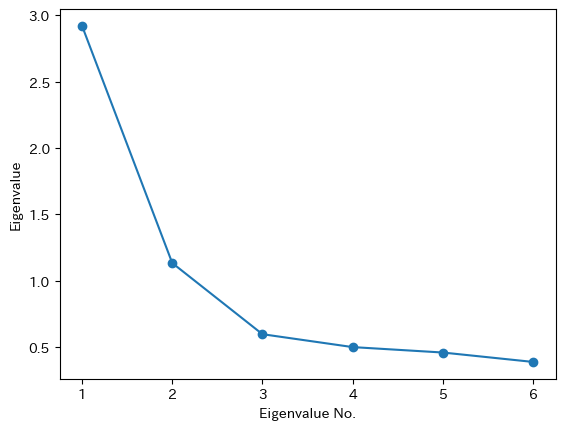

In [7]:
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

In [8]:
loadings = fa.loadings_
df_loadings = pd.DataFrame(loadings, index=X3.columns,
                           columns=['Factor1','Factor2'])
display(df_loadings)

,Factor1,Factor2
国語,-0.022736,0.638087
英語,0.019119,0.633600
社会,0.015992,0.769923
数学,0.840278,-0.090954
理科,0.681636,0.098866
技術,0.690910,0.034923


In [9]:
scores = fa.transform(X3)
df_scores = pd.DataFrame(scores, columns=['Factor1','Factor2'])
print(df_scores.shape)
display(df_scores.head())

(200, 2)


,Factor1,Factor2
0,1.533122,1.630708
1,2.433398,1.949411
2,1.493913,0.929021
3,-0.348116,-0.058698
4,-1.000738,-0.705613


# Uniquenesses (独自因子の割合)

In [10]:
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=X3.columns)
print(ser_uniqueness)

国語    0.592328
英語    0.598186
社会    0.406962
数学    0.285660
理科    0.525598
技術    0.521423
dtype: float64


In [11]:
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=['Factor1', 'Factor2'])
display(df_fa_var)

,Factor1,Factor2
var,1.649189,1.420652
prop_var,0.274865,0.236775
cum_var,0.274865,0.511640


In [12]:
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1
    r2 = 1
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=20)
    for i in range(len(score_2d)):
        m = '${}$'.format(i)
        plt.scatter(score_2d[i,0], score_2d[i,1], marker=m, s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

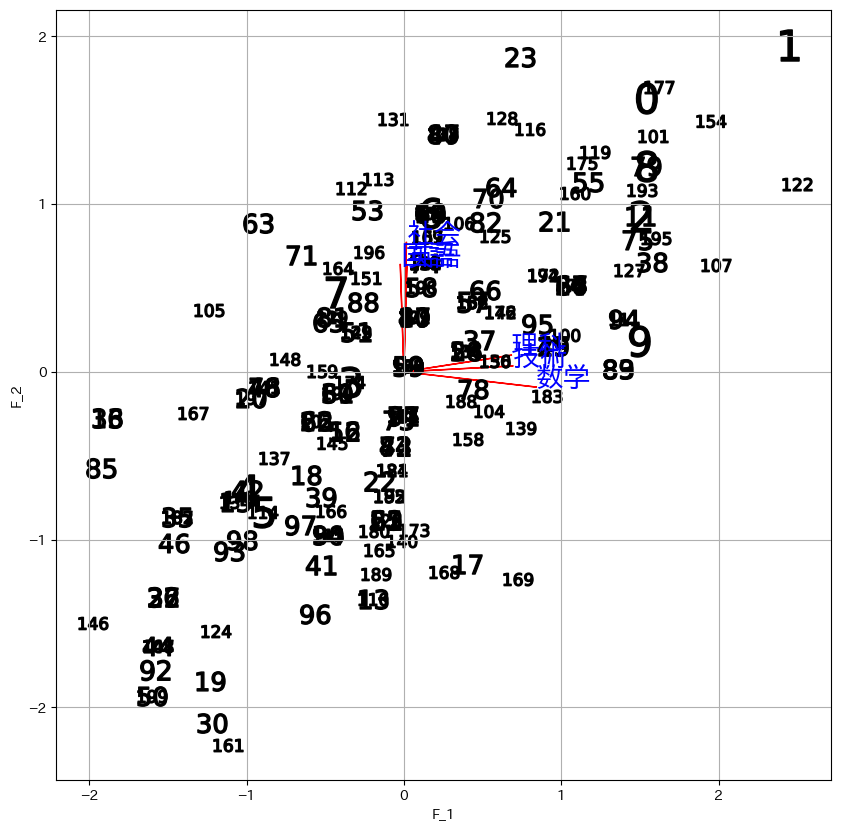

In [13]:
biplot_fa(scores, loadings, load_labels=X3.columns)

In [22]:
results = []
for i in range(1, 3):
    col_name = "Factor{}".format(i)
    variables = df_loadings[col_name].abs().sort_values(ascending=False)[:3].index
    results.append([col_name, ",".join(variables)])

# Dataframe 
df_results = pd.DataFrame(results, columns=["Factor", "Top 3 Variables"])
display(df_results)

,Factor,Top 3 Variables
0,Factor1,"数学,技術,理科"
1,Factor2,"社会,国語,英語"
